<h1><b><center>MLEnd Hums and Whistle Mini Project Advance Problem Formulation </center></b></h1>



# 1 Author




**Student Name:**   Shalini Jain 

**Student ID:**     EC211241/ 210973020




# 2 Problem Formulation

In this notebook, we will be building a machine learning pipeline using one of the algorithms of deep neural network i.e `Convolutional Neural Network` on the `MLEnd Hums and Whistles Data set` to predict the name of the song. 
The final model will be predicting the name of the song out of the 4 songs ('Hakuna', 'Panther', 'Showman', 'Mamma') based on the input audio file.

We will further train our model using neural networks to classify the demographic data of all the 8 songs based on gender. This model can also be used in future for genre classification, age based classification, etc by changing some of the features.






# 3 Machine Learning pipeline


The machine pipeline involves implementing a Convolutional Neural Network(CNN) model. This pipeline consist of multiple sequential steps that do everything from data extraction and preprocessing to model training and deployment.

1. **Data Preprocessing:** In this step raw data is generated and merged into one single framework. In our case we will be collecting MLEnd Hums and Whistle dataset  from the QMUL repository and stored in the private google drive. Potter and StarWars audio files are used to extract and clean the information about the data. 
</br>
2. **Data Cleaning:** 
Data cleaning refers to identifying and correcting errors in the dataset that may negatively impact a predictive model. Eliminating all the duplicates,incorrect file format and other errors.
</br>
3. **Feature Engineering:** Feature Engineering is the process of extracting useful features from the raw audio samples to perform an efficient model training. Since each audio file involves large dimensions we need to transform this into a relevant feature space. Also CNN model requires input to be in a particular feature shape and hence the input features needs to be transformed into appropriate feature space to be modelled into CNN.

4. **Model tuning and training:**involves fitting the CNN layers with the transformed features. The CNN has several layers where each layer performs a specific function of extracting relevant spacial information from the existing feature space. We can add different layers and tune different models for better performance.

5. **Evaluate the model's performance:** Evaluate the accuracy of our model on the validation data which is 30% of the training dataset.


# 4 Transformation Stage

This is the most crucial stage in constructing machine learning models and it often decides the performance of your model. This stage is further divided into two sections:


*   **Data pre-processing**

      MLEnd Hums and Whistle Data consists of raw audio files in a wav format. This stage involves reading all the files and extracting relevenat information like filename, Particpant Id, song name, interpretation type.
      </br>
*   **Feature Extraction**

      The audio files are in the wav format and it consists of thousands of dimensions. We can use the `librosa` library to read the audio files which loads them as samples recorded at a frequency `fs`. We can see the output samples for an audio file as below

      This visualization is called the time-domain representation of a given signal. This shows us the loudness (amplitude) of sound wave changing with time.

We will first import all the necessary libraries required to build the machine learning models.

In [ ]:
from google.colab import drive
import tensorflow as tf
from tensorflow.keras import models, layers

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa
import zipfile
from matplotlib import cm
import sklearn

from sklearn.preprocessing import normalize

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


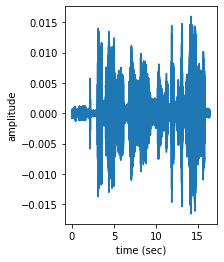

In [ ]:
#In this example we have taken random audio file from our dataset for plotting purpose
#The waveforms can be plotted in different forms like mono and stereo. Here we have plotted waveform in mono format
x, fs = librosa.load(file_list[0][3],sr=None)
t = np.arange(len(x))/fs
plt.subplot(1, 2, 1)
plt.plot(t,x)
plt.xlabel('time (sec)')
plt.ylabel('amplitude')
plt.show()
display(ipd.Audio(file_list[0][3]))


A Convolutional Neural Network, also known as CNN or ConvNet, is a class of neural networks that specializes in processing data that has a grid-like topology, such as an image. We will extract features from audio files which look like images and shape them in a way in order to feed them into a CNN.


* **Mel Spectrogram** - A spectogram is basically used to represent siganl time over time or 'loudness' of a signal over time at various frequencies present in a particular waveform. A spectrogram is obtained by stacking a set of FFT(Fast Fourier Transforms) on each other. A Mel Spectrogram is a spectrogram converted to the Mel scale.

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

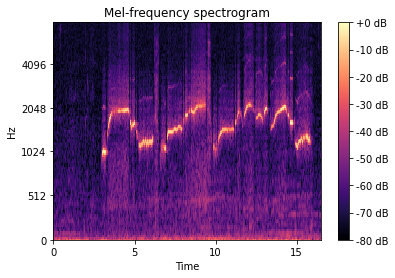

In [ ]:
import matplotlib.pyplot as plt
import librosa.display
S = librosa.feature.melspectrogram(y=x, sr=fs, n_mels=128,
                                    fmax=8000)
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=fs,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

* **Spectral Bandwidth** - Spectral bandwidth is the portion of a signal which contains most of the energy of the signal. It is defined as the width of the band of light at one-half the peak maximum (or full width at half maximum [FWHM]) and is represented by the two vertical red lines and λSB on the wavelength axis.


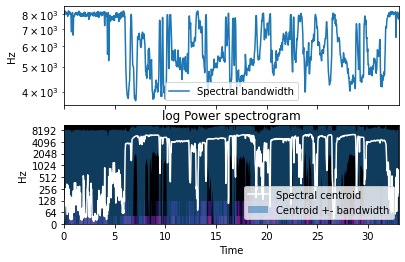

In [ ]:
fig, ax = plt.subplots(nrows=2, sharex=True)
spectral_bw = librosa.feature.spectral_bandwidth(y=x, sr=fs)
times_like = librosa.times_like(spectral_bw)
centroid = librosa.feature.spectral_centroid(S=S)
ax[0].semilogy(times_like, spectral_bw[0], label='Spectral bandwidth')
ax[0].set(ylabel='Hz', xticks=[], xlim=[times_like.min(), times_like.max()])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')
ax[1].fill_between(times_like, centroid[0] - spectral_bw[0], centroid[0] + spectral_bw[0],
                alpha=0.5, label='Centroid +- bandwidth')
ax[1].plot(times_like, centroid[0], label='Spectral centroid', color='w')
ax[1].legend(loc='lower right')

* **Spectral centroid** - Spectral centroid is a measure of the mass of the center of a spectrum. It indicates at which frequency the energy of a spectrum is centered upon or in other words It indicates where the ” center of mass” for a sound is located. 

[Text(0.5, 1.0, 'log Power spectrogram')]

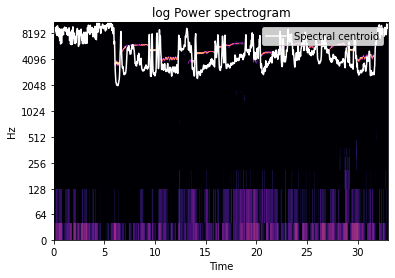

In [ ]:
centroid = librosa.feature.spectral_centroid(y=x, sr=fs)
times_like = librosa.times_like(centroid)
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times_like, centroid.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram')

* **Chromagram** - Chromatogram represents the spectral energy at the various pitch classes. A chroma represents a vector which is typically a 12-element feature vector indicating how much energy of each pitch class, {C, C#, D, D#, E, …, B}, is present in the signal. 

[Text(0.5, 1.0, 'Chromagram')]

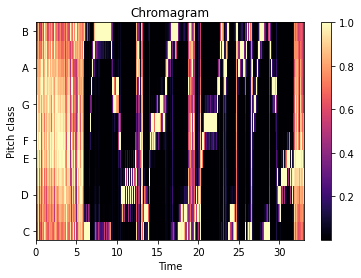

In [ ]:
chroma = librosa.feature.chroma_stft(y=x, sr=fs)
fig, ax = plt.subplots()
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='Chromagram')

* **MFCC** - MFCC or Mel Frequency Ceptral Coefficients are a set of features obtained by converting the conventional frequency to the Mel scale which describes the overall shape of a spectral envelope.

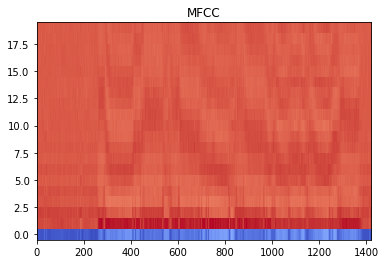

In [ ]:
fig, ax = plt.subplots()
mfcc_data = librosa.feature.mfcc(x,n_mfcc=20)
cax = ax.imshow(mfcc_data, interpolation='nearest', cmap=cm.coolwarm, origin='lower', aspect='auto')
ax.set_title('MFCC')
plt.show()

* **Short Time Fourier Transform(stft)** - STFTs are sequences of fourier transforms that provides information on how frequency changes for a non-stationary frequency signal. STFT are used to converts signals such that we can know the amplitude of the given frequency at a given time. Using STFT we can determine the amplitude of various frequencies playing at a given time of an audio signal.

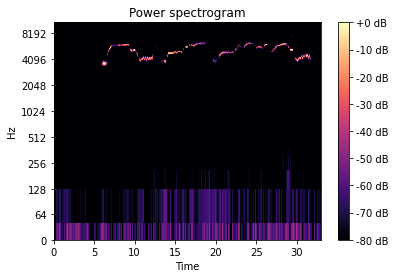

In [ ]:
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S,
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

These discussed techniques will further be used to extract relevant features for our model.

The below function will calculate all the features and the input to this function is a list of files which are placed in folders with their label names. Each audio file is loaded using the librosa library and sampled information is used to calculate the above mentioned features. Since CNN accepts all the features to be of same shape we need to apply padding to features which are not hhaving sufficient length and width.

**NOTE: We will be extracting 100 songs from each of the four files and train our model. Due to lack of proper computational resources needed to train CNN we will be only considering a subset of data for this assignment.**

In [ ]:
songs = ['Hakuna', 'Panther', 'Showman', 'Mamma']
def padding(array, xx, yy):
    h = array.shape[0]
    w = array.shape[1]
    a = max((xx - h) // 2,0)
    aa = max(0,xx - a - h)
    b = max(0,(yy - w) // 2)
    bb = max(yy - b - w,0)
    return np.pad(array, pad_width=((a, aa), (b, bb)), mode='constant')

def getFeatures(files):   
    features=[]     
    labels = []   
    for i in range(0, len(songs)):
      for j in tqdm(range(0,100)):      
        label = i
        x, sr = librosa.load(files[i][j],sr=1000)  
        max_size = 2000 
        stft = padding(np.abs(librosa.stft(x,n_fft=255, hop_length= 512)), 128, max_size)
        MFCCs = padding(librosa.feature.mfcc(x, n_fft=255, hop_length= 512,n_mfcc=128),128,max_size)
        spectral_cent = librosa.feature.spectral_centroid(x, sr)
        chroma_stft = librosa.feature.chroma_stft(x, sr)
        spectral_bw = librosa.feature.spectral_bandwidth(x, sr)

        image = np.array([padding(normalize(spectral_bw),1, max_size)]).reshape(1,max_size)
        image = np.append(image,padding(normalize(spectral_cent),1, max_size), axis=0) 
        for k in range(0,9):
            image = np.append(image,padding(normalize(spectral_bw),1, max_size), axis=0)
            image = np.append(image, padding(normalize(spectral_cent),1, max_size), axis=0)
            image = np.append(image, padding(normalize(chroma_stft),12, max_size), axis=0)
        image=np.dstack((image,np.abs(stft)))
        image=np.dstack((image,MFCCs))

        features.append(image[np.newaxis,...])    
        labels.append(label)     
        output=np.concatenate(features,axis=0) 

    return(np.array(output), labels)

# 5 Modelling

A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other. The pre-processing required in a ConvNet is much lower as compared to other classification algorithms.

We can see four sets of layers in the CNN added sequentially which has the following sublayers:
* 2D Convolutional Layer: A filter or a kernel in a conv2D layer “slides” over the 2D input data, performing an elementwise multiplication. 

* MaxPooling Layer - Max pooling is a pooling operation that selects the maximum element from the region of the feature map covered by the filter. This layers essentially downsamples the feature data so that the model will be able to handle the computation of the huge amount of the data.

* Dropout Layer - The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.This layer is added to counter overfitting in the model. It randomly select any portion of the data to be assigned zero weight.

* Flatten Layer - This is used for converting the data into a 1-dimensional array for inputting it to the next layer.

* Dense Layer - It is a simple layer of neurons in which each neuron receives input from all the neurons of previous layer, thus called as dense. This is the final layer which has the same feature size as the output.

In [ ]:
input_shape=(128,2000,3)
CNNmodel = models.Sequential()
CNNmodel.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
CNNmodel.add(layers.MaxPooling2D((2, 2)))
CNNmodel.add(layers.Dropout(0.5))

CNNmodel.add(layers.Conv2D(64, (3, 3), activation='relu'))
CNNmodel.add(layers.MaxPooling2D((2, 2)))
CNNmodel.add(layers.Dropout(0.5))

CNNmodel.add(layers.Conv2D(64, (3, 3), activation='relu'))
CNNmodel.add(layers.Flatten())
CNNmodel.add(layers.Dense(64, activation='relu'))
CNNmodel.add(layers.Dropout(0.2))

CNNmodel.add(layers.Dense(32, activation='relu'))
CNNmodel.add(layers.Dense(24, activation='softmax'))
CNNmodel.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

We have used 3 layers of convolutional networks in above code.This is the feature space that we will be  extracting from the raw audio time series data. The initial two layers has a Dropout layer with 0.5 to dampen the overfitting of the model. 

We have used the `adam` optimizer to help the model predict the output.

# 6. Methodology
We will split the data set into train set(70%) and test set(30%). We will then run the trained model against the test data to access the performance.

Below are the steps which are used in evaluating the performance of the model:



*   Train the selected model on a training dataset.
*   Evaluating the model on a validation datasetset 
*   Hyperparameter tuning
*   Training the model again with best parameters and test the accuracy.


**Evaluation Measures:**

**Confusion Matrix:**
A confusion matrix is a summary of prediction results on a classification problem. In our case since we have four classes ('Hakuna', 'Panther', 'Showman', 'Mamma') it will give us 4 X 4 matrix with True Positive values, True Negative values, False Positive and False Negative values for the classification.


**Precision**  Precision refers to the number of true positives divided by the total number of positive predictions 

**Recall** It is a metric that quantifies the number of correct positive predictions made out of all positive predictions that could have been made.

# 7 Dataset

We have taken a subset of MLEnd Hums and Whistle data set for building the model in this notebook. The sample data consists of hums and whistles of the songs 'Hakuna', 'Panther', 'Showman', 'Mamma'.

We have four folders where the folder of the name indicates the class of the audio file they contain. We can load the files separately and assign the class labels based on the folder name.

The data is loaded from a google drive folder which is mounted in google colab.

In [ ]:
drive.mount('/content/drive')

path = '/content/drive/MyDrive/Data/MLEndHW/'

labels = ['Panther', 'Mamma', 'Hakuna', 'Showman']
file_list = []
for label in labels:
  sample_path = path + label + '/*.wav'
  print("The number of files for " + label + " is "  + str(len(glob.glob(sample_path))))
  file_list.append(glob.glob(sample_path))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
The number of files for Rain is 413
The number of files for Potter is 411
The number of files for Panther is 413
The number of files for StarWars is 412
The number of files for Mamma is 412
The number of files for Hakuna is 412
The number of files for Showman is 410
The number of files for Frozen is 410


# 8. Results

We will extract features for our model using above getFeatures method.

In [ ]:
import warnings
warnings.filterwarnings('ignore')
train_features, train_labels = getFeatures(file_list)

100%|█████████████████████████████████████████| 100/100 [05:42<00:00,  3.43s/it]


Splitting the extracted data into testing and training dataset.

In [ ]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm
X_train, X_test, y_train, y_test = train_test_split(train_features,train_labels,test_size=0.3)
history = CNNmodel.fit(np.array(X_train), np.array(y_train), epochs=100, validation_data=(np.array(X_test), np.array(y_test)))

Train on 280 samples, validate on 120 samples
Epoch 1/100
280/280 [==============================] - 526s 2s/sample - loss: 5.9631 - accuracy: 0.1964 - val_loss: 2.9377 - val_accuracy: 0.2250
Epoch 2/100
280/280 [==============================] - 503s 2s/sample - loss: 2.3983 - accuracy: 0.2393 - val_loss: 2.7739 - val_accuracy: 0.2167
Epoch 3/100
280/280 [==============================] - 481s 2s/sample - loss: 2.0762 - accuracy: 0.2179 - val_loss: 2.0998 - val_accuracy: 0.2833
Epoch 4/100
280/280 [==============================] - 456s 2s/sample - loss: 1.8061 - accuracy: 0.2821 - val_loss: 2.2353 - val_accuracy: 0.3500
Epoch 5/100
280/280 [==============================] - 458s 2s/sample - loss: 1.6889 - accuracy: 0.3036 - val_loss: 2.0820 - val_accuracy: 0.3583
Epoch 6/100
280/280 [==============================] - 450s 2s/sample - loss: 1.6217 - accuracy: 0.2929 - val_loss: 2.1010 - val_accuracy: 0.2917
Epoch 7/100
280/280 [==============================] - 454s 2s/sample - loss: 

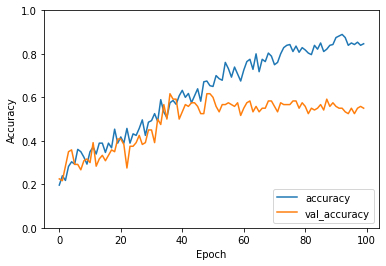

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

The graph above shows the training accuracy reaching almost 90%, but the validation accuracy has reached a peak at 55%. Due to this the model has been overfitted.

Further analysis of performance can be done using confusion matrix, precision and recall.

In [ ]:
CNNmodel.evaluate(np.array(X_test), np.array(y_test))

120/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.4326508442560832, 0.55]

[[13  5  2 13]
 [ 7 17  2  4]
 [ 7  3 15  5]
 [ 2  2  2 21]]
              precision    recall  f1-score   support

           0       0.45      0.39      0.42        33
           1       0.63      0.57      0.60        30
           2       0.71      0.50      0.59        30
           3       0.49      0.78      0.60        27

    accuracy                           0.55       120
   macro avg       0.57      0.56      0.55       120
weighted avg       0.57      0.55      0.55       120



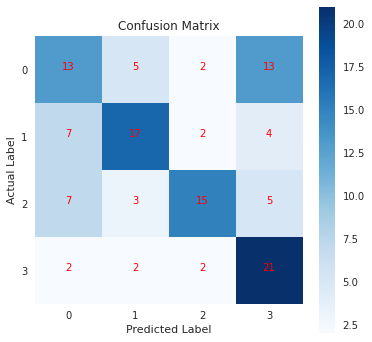

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
y_test_pred = np.argmax(CNNmodel.predict(X_test), axis = 1) 
conf_mat = confusion_matrix(y_test, y_test_pred)
print(conf_mat)

with plt.style.context(('ggplot', 'seaborn')):
    fig = plt.figure(figsize=(6,6), num=1)
    plt.imshow(conf_mat, interpolation='nearest',cmap= plt.cm.Blues )
    plt.xticks([0,1,2,3],[0,1,2,3])
    plt.yticks([0,1,2,3],[0,1,2,3])
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    for i, j in itertools.product(range(conf_mat.shape[0]), range(conf_mat.shape[1])):
                plt.text(j, i,conf_mat[i, j], horizontalalignment="center",color="red")
    plt.grid(None)
    plt.title('Confusion Matrix')
    plt.colorbar();

from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, precision_recall_fscore_support
print(classification_report(y_test, y_test_pred))

The above confusion matrix shows the class 0 ('Panther') has been mostly classified into class 3('Showman'). Also class 3('Showman') has been mostly classified correctly followed by class 1('Mamma').
Similar analysis can be done for further classes.

# 8.1 Further Analysis on Demographic DataSet

We can use different algorithms of neural network to further classify the audios based on gender, age-range, Nationality and genre. This model can also be further used in real world applications to predict the above classifications based on different audio datasets.

For the classification we are only using 4 Songs i.e Hakuna,Mamma, Showman, Panther. Same model can be used for other songs as well with parameter tuning.

In [84]:
demographic_df = pd.read_csv("/content/MLEndHWD_Demographics_Miniproject.csv")
#Dropping rows having NaN as Gender as this is not required for analysis
demographic_df= demographic_df.dropna(subset=['Gender'])
demographic_df

ID  Language1 Language2    Age Nationality         Coordinates  Gender
0     S76      Hindi   English  20-24      Indian    (40.60, -122.40)  Female
1    S217        NaN       NaN    NaN         NaN                 NaN  Female
2    S221  Malayalam     Hindi  25-29      Indian  (11.8745, 75.3704)  Female
3    S173       Akan   English  50-59    Ghanaian   (5.6037, -0.1870)    Male
4    S115      Hindi   English  20-24      Indian  (28.7041, 77.1025)    Male
..    ...        ...       ...    ...         ...                 ...     ...
265  S273    Bengali   English  25-29      Indian       (22.70,88.37)    Male
266  S234    Chinese   English  20-24     Chinese      (51.52, -0.04)  Female
267  S253      Hindi   English  45-49      Indian      (25.80, 84.12)    Male
268  S229    Chinese   English  25-29     Chinese     (30.00, 120.00)    Male
273  S244    English     Hindi  25-29      Indian      (51.52, -0.04)  Female

[187 rows x 7 columns]

In [85]:
#This is used to calculate no of participants and also to determine count of females and male who have submitted their demographic record 
member = demographic_df[['ID', 'Gender']].groupby(['Gender']).count()
member

ID
Gender     
Female   64
Male    123

Data pre-processing and cleaning is done on all the 8 songs and we have discarded few songs because of incorrect format and other reasons like filename issue, etc. Further there are total 3266 songs out of which we have only taken 1632 for our analysis. 
The output of the above process is saved in the csv file and is being used here for analysis. 

In [86]:
all_songs_df = pd.read_csv("/content/Song_Details.csv")
all_songs_df
#Dropping rows having NaN as Gender as this is not required for analysis

file_id    ID interpretation number     song  \
0           S1_hum_2_Panther.wav    S1            hum      2  Panther   
1       S1_whistle_1_Panther.wav    S1        whistle      1  Panther   
2           S2_hum_2_Panther.wav    S2            hum      2  Panther   
3       S2_whistle_1_Panther.wav    S2        whistle      1  Panther   
4           S3_hum_2_Panther.wav    S3            hum      2  Panther   
...                          ...   ...            ...    ...      ...   
1627      S219_hum_4_Showman.wav  S219            hum      4  Showman   
1628      S221_hum_1_Showman.wav  S221            hum      1  Showman   
1629  S221_whistle_2_Showman.wav  S221        whistle      2  Showman   
1630      S222_hum_1_Showman.wav  S222            hum      1  Showman   
1631  S222_whistle_2_Showman.wav  S222        whistle      2  Showman   

                                              file_path  
0     /content/drive/MyDrive/Data/MLEndHW/Songs/S1_h...  
1     /content/drive/MyDrive/Data/MLEndHW/Songs/S1_w...  
2     /content/drive/MyDrive/Data/MLEndHW/Songs/S2_h...  
3     /content/drive/MyDrive/Data/MLEndHW/Songs/S2_w...  
4     /content/drive/MyDrive/Data/MLEndHW/Songs/S3_h...  
...                                                 ...  
1627  /content/drive/MyDrive/Data/MLEndHW/Songs/S219...  
1628  /content/drive/MyDrive/Data/MLEndHW/Songs/S221...  
1629  /content/drive/MyDrive/Data/MLEndHW/Songs/S221...  
1630  /content/drive/MyDrive/Data/MLEndHW/Songs/S222...  
1631  /content/drive/MyDrive/Data/MLEndHW/Songs/S222...  

[1632 rows x 6 columns]

Combining both the dataframes to fetch only those participants who have submitted their recordings and also have added demographic data.

In [87]:
combined_df=all_songs_df.merge(demographic_df,on='ID')
combined_df

file_id    ID interpretation number     song  \
0           S1_hum_2_Panther.wav    S1            hum      2  Panther   
1       S1_whistle_1_Panther.wav    S1        whistle      1  Panther   
2            S1_hum_2_Hakuna.wav    S1            hum      2   Hakuna   
3        S1_whistle_2_Hakuna.wav    S1        whistle      2   Hakuna   
4             S1_hum_2_Mamma.wav    S1            hum      2    Mamma   
...                          ...   ...            ...    ...      ...   
1129   S222_whistle_2_Hakuna.wav  S222        whistle      2   Hakuna   
1130        S222_hum_2_Mamma.wav  S222            hum      2    Mamma   
1131    S222_whistle_2_Mamma.wav  S222        whistle      2    Mamma   
1132      S222_hum_1_Showman.wav  S222            hum      1  Showman   
1133  S222_whistle_2_Showman.wav  S222        whistle      2  Showman   

                                              file_path Language1 Language2  \
0     /content/drive/MyDrive/Data/MLEndHW/Songs/S1_h...   Chinese       NaN   
1     /content/drive/MyDrive/Data/MLEndHW/Songs/S1_w...   Chinese       NaN   
2     /content/drive/MyDrive/Data/MLEndHW/Songs/S1_h...   Chinese       NaN   
3     /content/drive/MyDrive/Data/MLEndHW/Songs/S1_w...   Chinese       NaN   
4     /content/drive/MyDrive/Data/MLEndHW/Songs/S1_h...   Chinese       NaN   
...                                                 ...       ...       ...   
1129  /content/drive/MyDrive/Data/MLEndHW/Songs/S222...   English    Yoruba   
1130  /content/drive/MyDrive/Data/MLEndHW/Songs/S222...   English    Yoruba   
1131  /content/drive/MyDrive/Data/MLEndHW/Songs/S222...   English    Yoruba   
1132  /content/drive/MyDrive/Data/MLEndHW/Songs/S222...   English    Yoruba   
1133  /content/drive/MyDrive/Data/MLEndHW/Songs/S222...   English    Yoruba   

        Age Nationality      Coordinates  Gender  
0     25-29     Chinese  (25.03, 121.56)    Male  
1     25-29     Chinese  (25.03, 121.56)    Male  
2     25-29     Chinese  (25.03, 121.56)    Male  
3     25-29     Chinese  (25.03, 121.56)    Male  
4     25-29     Chinese  (25.03, 121.56)    Male  
...     ...         ...              ...     ...  
1129  25-29       Irish    (51.48, 0.00)  Female  
1130  25-29       Irish    (51.48, 0.00)  Female  
1131  25-29       Irish    (51.48, 0.00)  Female  
1132  25-29       Irish    (51.48, 0.00)  Female  
1133  25-29       Irish    (51.48, 0.00)  Female  

[1134 rows x 12 columns]

Now we have the dataset and we can use this dataset and extract relevant features for our model to classify based on gender. In this method we have used MFCCs, stft, chroma, mel. Also other features can be added in future to yield better results on realworld dataset.

In [88]:
# Although this function was modified and many parameteres were explored with, most of it 
# came from Source 8 (sources in the READ.ME)
import librosa
def extractFeatures(files):
    
    # Sets the name to be the path to where the file is in my computer
    file_name = str(files.file_path)

    # Loads the audio file as a floating point time series and assigns the default sample rate
    # Sample rate is set to 22050 by default
    X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 

    # Generate Mel-frequency cepstral coefficients (MFCCs) from a time series 
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)

    # Generates a Short-time Fourier transform (STFT) to use in the chroma_stft
    stft = np.abs(librosa.stft(X))

    # Computes a chromagram from a waveform or power spectrogram.
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)

    # Computes a mel-scaled spectrogram.
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
        
    
    # We add also the classes of each file as a label at the end
    label = files.Gender

    return mfccs, chroma, mel, label

In [89]:
features = combined_df.apply(extractFeatures, axis=1)

In [94]:
#Saving the features in an np array because it takes longer time to extract features
np.save('features', features)

In [96]:
features_label = np.load('features.npy', allow_pickle=True)

In [99]:
# We create an empty list where we will concatenate all the features into one long feature
# for each file to feed into our neural network 

features = []
for i in range(0, len(features_label)):
    features.append(np.concatenate((features_label[i][0], features_label[i][1], 
                features_label[i][2]), axis=0))

In [101]:
# Similarly, we create a list where we will store all the labels

labels = []
for i in range(0, len(features_label)):
    labels.append(features_label[i][3])

In [102]:
# Setting our X as a numpy array to feed into the neural network
X = np.array(features)

In [153]:
# Setting our y
y = np.array(labels)

In [154]:
#Importing all the necessary libraries
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


We will be converting the labels into one hot encoding format. One hot encoding can be defined as a process of converting categorical variables into a form that could be provided to ML algorithms to do a better job in prediction.

In [155]:
lb = LabelEncoder()
y = to_categorical(lb.fit_transform(y))

Next step is to split the dataset into training and validation. We will be using 20% of the dataset for validation and 80% for training

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [164]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

For the classification we will be using neural network model or neural network which is used to approximate an unknown function using historical data or observations from a domain. Neural networks belong to the class of supervised machine learning algorithms, and try to resemble the way a human brain works.

**Activation =** In this model we have used ReLU (Rectified Linear Unit) Activation Function which is mostly used in almost all the convolutional neural networks or deep learning models.

**DropoutLayer =** This is basically used to prevent our model from overfitting.It randomly selects edges of hidden units and sets it 0 at each update of training phase.

**Early stopping** = It is a method that takes number of training epochs and stops training once the model performance stops improving on a hold out validation dataset.

**Categorical_crossentropy** = It is Used as a loss function for multi-class classification model where there are two or more output labels. 

In [162]:

model = Sequential()

model.add(Dense(180, input_shape=(180,), activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(180, activation = 'relu'))
model.add(Dropout(0.25))  

model.add(Dense(100, activation = 'relu'))
model.add(Dropout(0.25))    

model.add(Dense(2, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')

In [163]:
history = model.fit(X_train, y_train, batch_size=20, epochs=100, 
                    validation_data=(X_test, y_test),
                    callbacks=[early_stop])
                    

Epoch 1/100
46/46 [==============================] - 2s 12ms/step - loss: 0.4687 - accuracy: 0.7861 - val_loss: 0.3408 - val_accuracy: 0.8370
Epoch 2/100
46/46 [==============================] - 0s 5ms/step - loss: 0.2741 - accuracy: 0.8787 - val_loss: 0.3132 - val_accuracy: 0.8722
Epoch 3/100
46/46 [==============================] - 0s 7ms/step - loss: 0.2314 - accuracy: 0.9052 - val_loss: 0.3449 - val_accuracy: 0.8722
Epoch 4/100
46/46 [==============================] - 0s 5ms/step - loss: 0.2238 - accuracy: 0.9041 - val_loss: 0.3819 - val_accuracy: 0.8722
Epoch 5/100
46/46 [==============================] - 0s 4ms/step - loss: 0.2014 - accuracy: 0.9195 - val_loss: 0.3741 - val_accuracy: 0.8767
Epoch 6/100
46/46 [==============================] - 0s 4ms/step - loss: 0.1689 - accuracy: 0.9316 - val_loss: 0.3658 - val_accuracy: 0.8767
Epoch 7/100
46/46 [==============================] - 0s 4ms/step - loss: 0.1485 - accuracy: 0.9394 - val_loss: 0.3719 - val_accuracy: 0.8855
Epoch 8/100


In [165]:
# Checking how our model looks like and how many parameters it has
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_59 (Dense)            (None, 180)               32580     
                                                                 
 dropout_45 (Dropout)        (None, 180)               0         
                                                                 
 dense_60 (Dense)            (None, 180)               32580     
                                                                 
 dropout_46 (Dropout)        (None, 180)               0         
                                                                 
 dense_61 (Dense)            (None, 100)               18100     
                                                                 
 dropout_47 (Dropout)        (None, 100)               0         
                                                                 
 dense_62 (Dense)            (None, 2)               

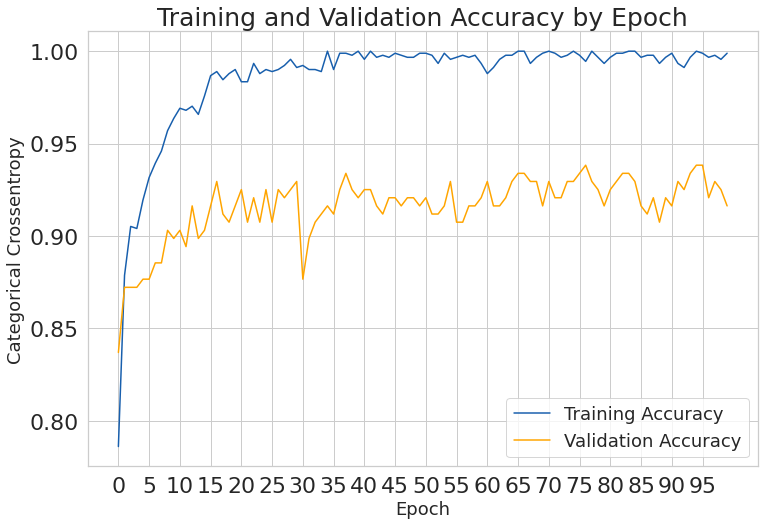

In [166]:
# Check out our train accuracy and validation accuracy over epochs.
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_accuracy, label='Training Accuracy', color='#185fad')
plt.plot(val_accuracy, label='Validation Accuracy', color='orange')

# Set title
plt.title('Training and Validation Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(range(0,100,5), range(0,100,5))

plt.legend(fontsize = 18);

The graph above shows the training accuracy reaching almost 99%, but the validation accuracy has reached a peak at approx 92%. Due to this the model is slightly overfitting.

Further analysis of performance can be done using confusion matrix, precision and recall.

# 9. Conclusions

We have classified 4 song using CNN model and it has a high training accuracy, but the testing accuracy is comparatively low. This implies the model is overfitting the training data, and hence has to be tuned to able to predict good results for the testing data. This must be due to the small size of the training data and large number of features. 
We need more training samples to build a more correct model to predict results more accurately.

Further noise reduction, frameshifting from the audio files can help in better classifying the songs. 

We have also classified our songs based on gender using neural networks. By adding dropout layers and activation methods the performance of our model is improved but due to small size of training dataset we cannot determine the actual accuracy of the model.

Also the model can further be used to classify genres,age,etc.We can also classify our songs based on Nationality and determine the ratio of hums and whistle from a particular nationality. 

References: 

https://www.kdnuggets.com/2020/02/audio-data-analysis-deep-learning-python-part-1.html

https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6

https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

https://benjamin-spilsbury.medium.com/data-synesthesia-using-python-to-visualize-audio-39a8a8550720